# <center>Decision Tree</center>
---

In this lab exercise, you will learn a popular machine learning algorithm, Decision Tree. You will use this classification algorithm to build a model from historical data of patients, and their respond to different medications. Then you use the trained decision tree to predict the class of a unknown patient, or to find a proper drug for a new patient.

Import the Following Libraries:
<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>DecisionTreeClassifier</b> from <b>sklearn.tree</b> </li>
</ul>

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

### About dataset
---
Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The feature sets of this dataset are Age, Sex, Blood Pressure, and Cholesterol of patients, and the target is the drug that each patient responded to.

It is a sample of binary classifier, and you can use the training part of the dataset
to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe it to a new patient.


now, read data using pandas dataframe:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
my_abalone = pd.read_csv("/content/drive/My Drive/Pertemuan 11/3. Klasifikasi/abalone_str.csv", delimiter=",")
my_abalone[0:5]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Size, Type of Data
---

What is the size of data?
What is the type of data?

In [4]:
#Size of Data

print(my_abalone.shape)

(4177, 9)


In [5]:
#Type of Data

my_abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


## Pre-processing
---

Using <b>my_data</b> as the Drug.csv data read by pandas, declare the following variables: <br>
<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of my_data) </li>

    
    <li> <b> y </b> as the <b> response vector (target) </b> </li>


   
</ul>

Remove the column containing the target name since it doesn't contain numeric values.

In [6]:
X = my_abalone[['Sex', 'Length', 'Diameter', 'Height', 'Rings']].values
X[0:5]

array([['M', 0.455, 0.365, 0.095, 15],
       ['M', 0.35, 0.265, 0.09, 7],
       ['F', 0.53, 0.42, 0.135, 9],
       ['M', 0.44, 0.365, 0.125, 10],
       ['I', 0.33, 0.255, 0.08, 7]], dtype=object)

As you may figure out, some featurs in this dataset are catergorical such as __Sex__ or __BP__. Unfortunately, Sklearn Decision Trees do not handle categorical variables. But still we can convert these features to numerical values. __pandas.get_dummies()__
Convert categorical variable into dummy/indicator variables.

In [7]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M','I'])
X[:,0] = le_sex.transform(X[:,0])

X[0:5]

array([[2, 0.455, 0.365, 0.095, 15],
       [2, 0.35, 0.265, 0.09, 7],
       [0, 0.53, 0.42, 0.135, 9],
       [2, 0.44, 0.365, 0.125, 10],
       [1, 0.33, 0.255, 0.08, 7]], dtype=object)

Now we can fill the target variable.

In [8]:
y = my_abalone["Sex"]
y[0:5]

,Sex
0,M
1,M
2,F
3,M
4,I



## Setting up the Decision Tree
---
We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

## The Shape of Trainset and Testset
---

Print the shape of X_trainset and y_trainset. Ensure that the dimensions match

Print the shape of X_testset and y_testset. Ensure that the dimensions match

In [11]:
#The shape of Trainset

print ("Ukuran X_trainset = ", X_trainset.shape)
print ("Ukuran y_trainset = ", y_trainset.shape)

Ukuran X_trainset =  (2923, 5)
Ukuran y_trainset =  (2923,)


In [12]:
#The shape of Testset

print ("Ukuran X_testset = ", X_testset.shape)
print ("Ukuran y_testset = ", y_testset.shape)

Ukuran X_testset =  (1254, 5)
Ukuran y_testset =  (1254,)


## Modeling
---
We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>

In [13]:
AbaloneTree = DecisionTreeClassifier(criterion="gini", max_depth = 10)
AbaloneTree # it shows the default parameters

DecisionTreeClassifier(max_depth=10)

In [14]:
AbaloneTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(max_depth=10)

## Prediction
---
Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.

You can print out <b>predTree</b> and <b>y_testset</b> if you want to visually compare the prediction to the actual values.

In [15]:
predTree = AbaloneTree.predict(X_testset)

In [16]:
print (predTree [0:5])
print (y_testset [0:5])


['M' 'F' 'F' 'M' 'M']
2686    M
202     F
1200    F
2840    M
3760    M
Name: Sex, dtype: object


## Evaluation
---
Next, let's import __metrics__ from sklearn and check the accuracy of our model.

In [17]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  1.0


__Accuracy classification score__ computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.  

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


## Visualization
---

Lets visualize the tree. Install the Library first.

We need the library:
- pydotplus
- graphviz
- six
- sys

How to install library graphviz:
- download the Source code for library graphviz at https://graphviz.org/download/
- download the version based on your operating system
- install file.exe until success
- write in cell at your jupyter notebook:

    - import os
    - os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38/bin/'

In [18]:
#import os
#os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38/bin/'

In [19]:
#Install Library: pydotplus
#If you need to install, erase #

!pip install pydotplus

In [20]:
#Use Library: six and sys

import six
import sys


In [21]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

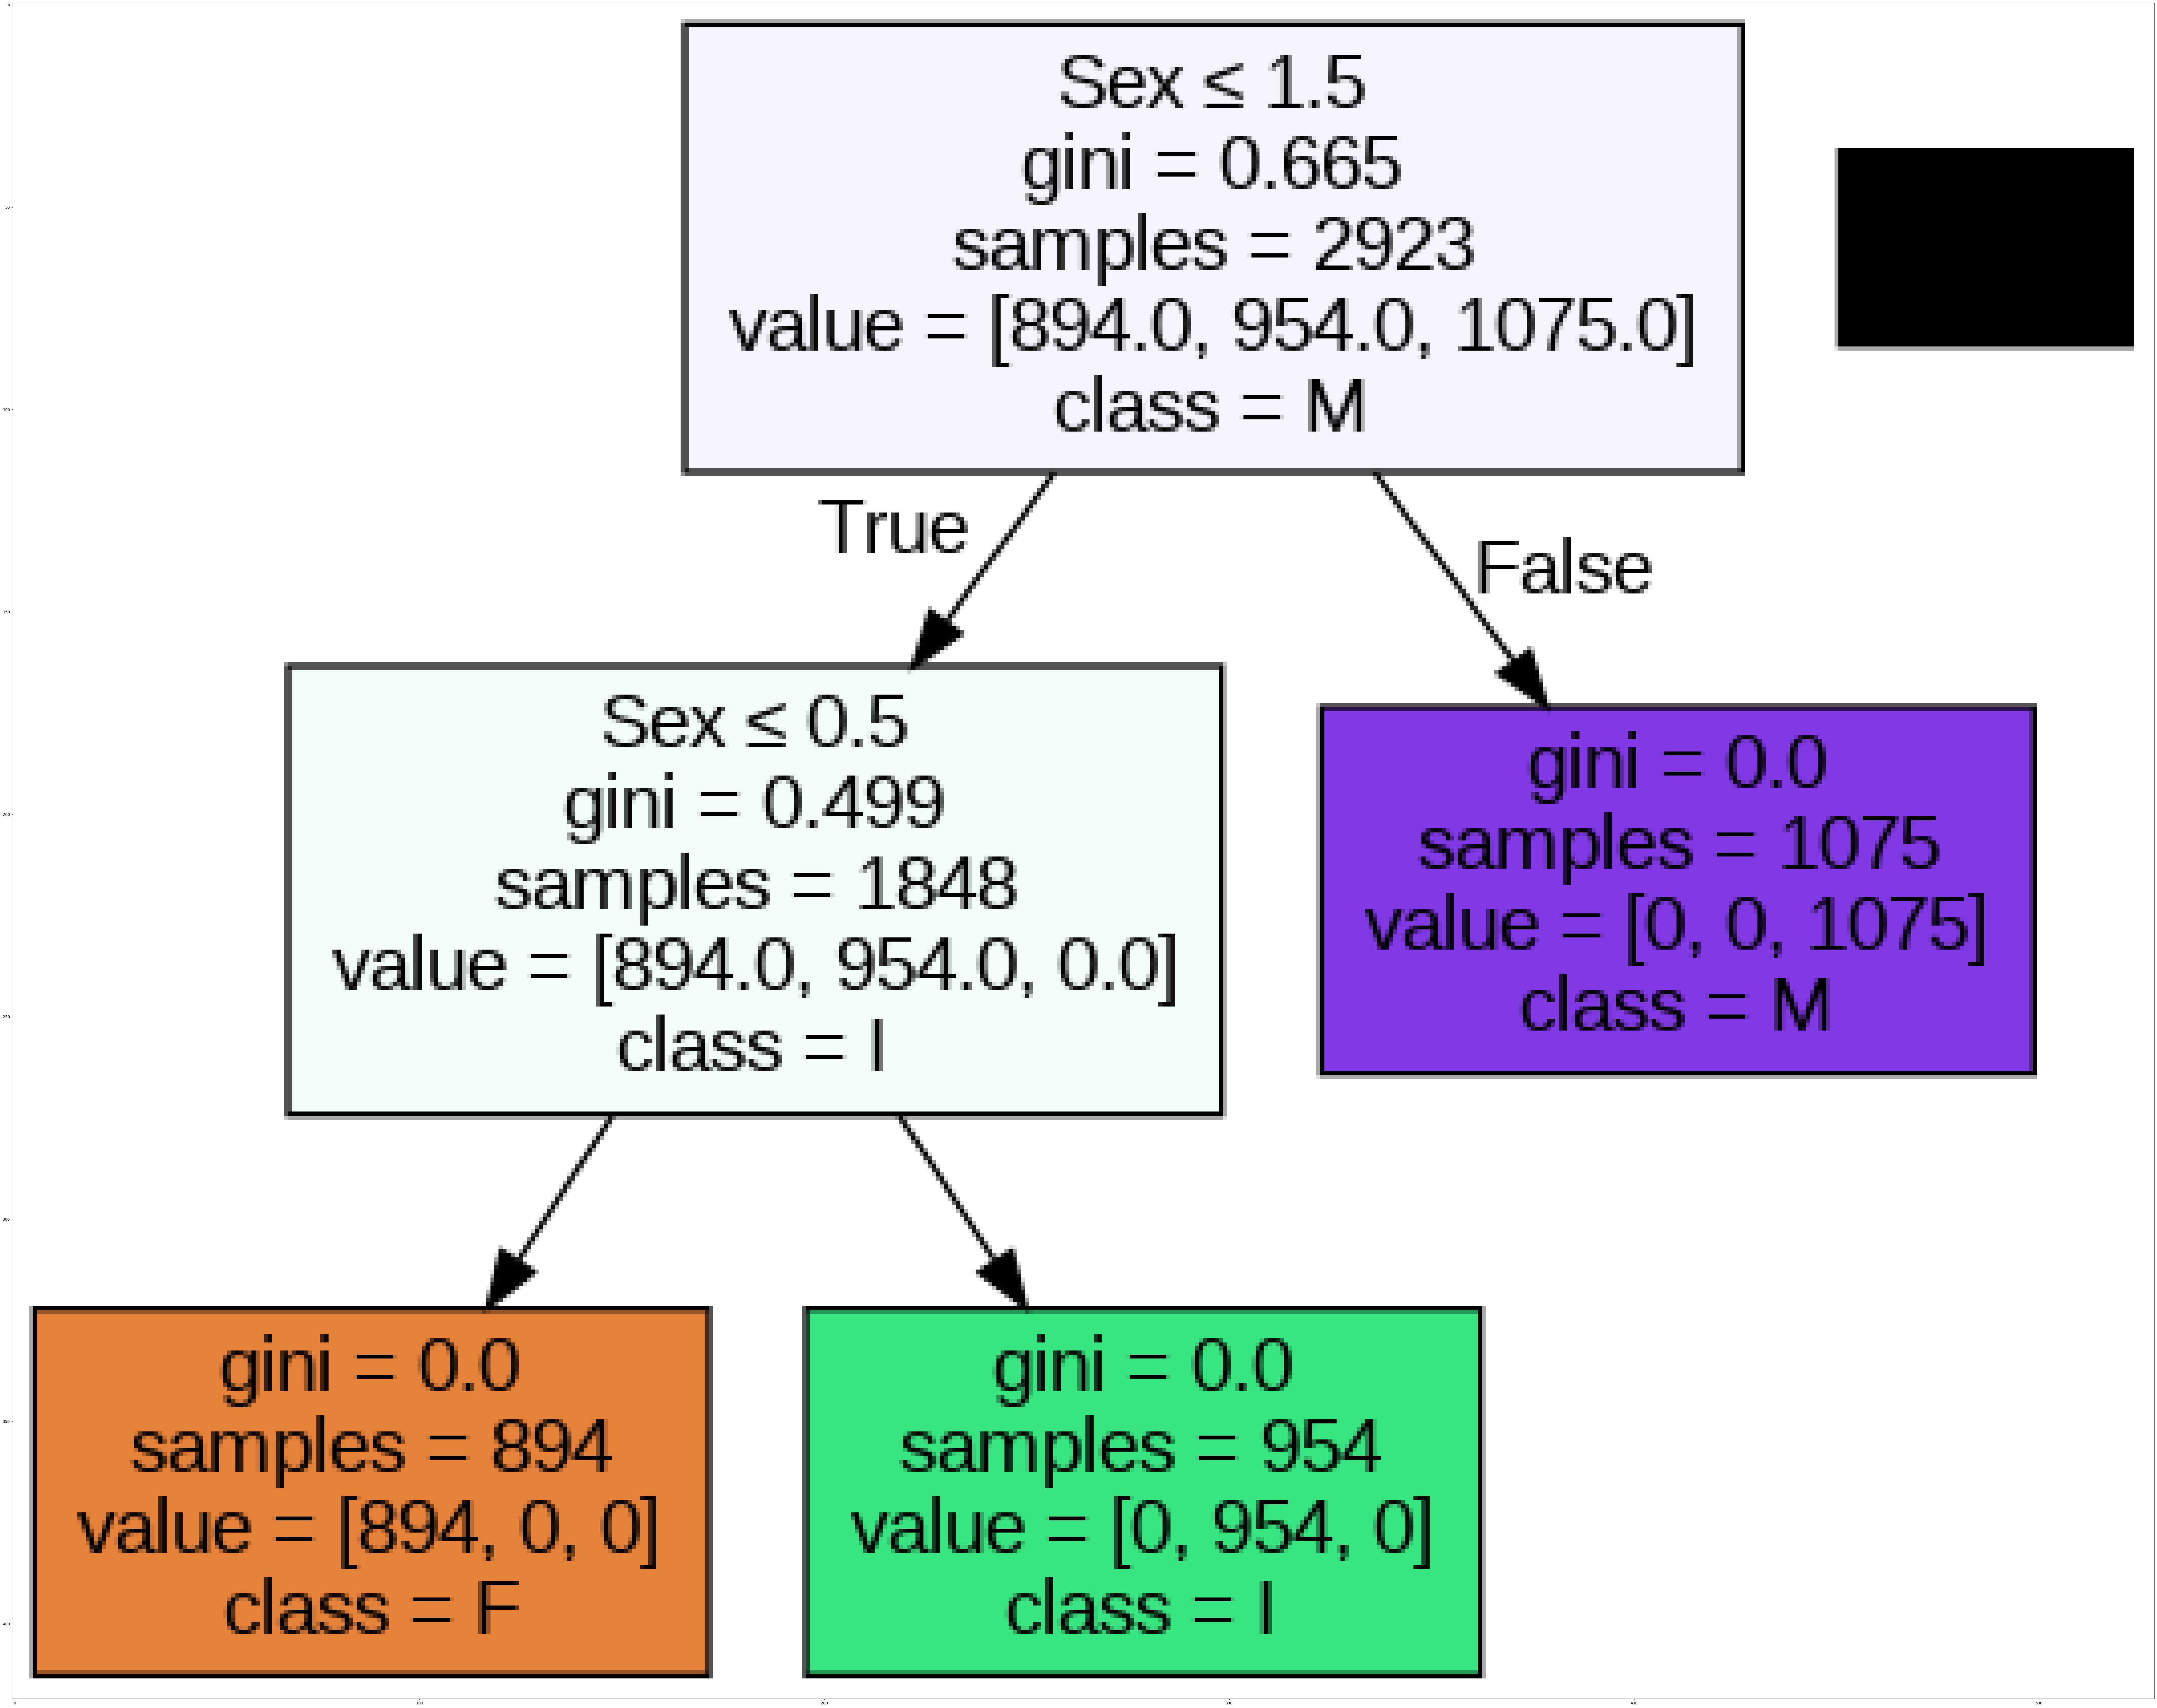

In [22]:
dot_data = StringIO()
filename = "Abalonetree.png"
featureNames = (my_abalone.columns[0:5])
targetNames = my_abalone["Sex"].unique().tolist()
out=tree.export_graphviz(AbaloneTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')